In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re

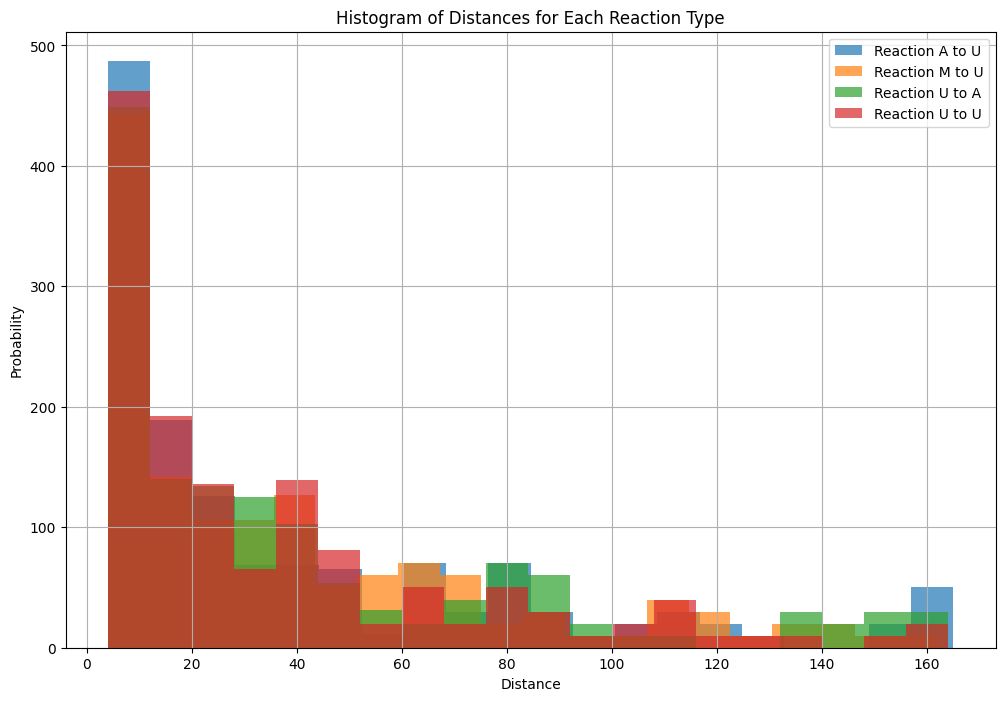

Reaction f1 count: 1376
Reaction f2 count: 1376
Reaction f3 count: 1376
Reaction f4 count: 1375


In [3]:
# Define the path to your log file
log_file_path = 'output.log'

# Initialize a dictionary to store the count of each reaction type
reaction_counts = {
    'f1': 0,
    'f2': 0,
    'f3': 0,
    'f4': 0
}

# Initialize dictionaries to store distances for each type of reaction
reaction_distances = {
    'f1': [],
    'f2': [],
    'f3': [],
    'f4': []
}

# Open the log file and read its contents
with open(log_file_path, 'r') as file:
    lines = file.readlines()

# Define a regex pattern to match lines containing reacting atom IDs and distances
pattern = re.compile(r'reacted_atom_IDs: (\d+) (\d+)')

# Counter to track the current line type (f1, f2, f3, f4)
line_type = 0

# Loop through each line and search for the pattern
for line in lines:
    match = pattern.search(line)
    if match:
        # Extract atom IDs
        atom_id_1 = int(match.group(1))
        atom_id_2 = int(match.group(2))
        
        # Calculate distance
        distance = abs(atom_id_1 - atom_id_2)
        
        # Append distance to the appropriate reaction type
        reaction_distances['f' + str(line_type + 1)].append(distance)
        
        # Increment the count for the corresponding reaction type
        reaction_counts['f' + str(line_type + 1)] += 1
        
        # Update the line type counter (cycle through f1, f2, f3, f4)
        line_type = (line_type + 1) % 4


labels = {"f1" : "Reaction A to U","f2" : "Reaction M to U","f3" : "Reaction U to A","f4" : "Reaction U to U"}

# Plot histograms of distances for each reaction type
plt.figure(figsize=(12, 8))
for reaction_type, distances in reaction_distances.items():
    plt.hist(distances, bins=20, alpha=0.7, label=f'{labels[reaction_type]}', density=False)

plt.title('Histogram of Distances for Each Reaction Type')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

# Print the counts of each reaction type
for reaction_type, count in reaction_counts.items():
    print(f'Reaction {reaction_type} count: {count}')
